In [354]:
import numpy as np
import os
import matplotlib.pyplot as plt

from PIL import Image 

In [355]:
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Activation
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier

In [356]:
train_data = '../data/raw/train/'
test_data = '../data/raw/test/'
val_data = '../data/raw/val/'

process_train = '../data/processed/train/'
process_test = '../data/processed/test/'
process_val = '../data/processed/val/'

category_names = ['messy/', 'clean/']

In [357]:
# Train GrayScale with new size 50x50

clean_train = []
messy_train = []
y_train = []

for category in category_names:
    
    path_processed = process_train+category
    
    for image in os.listdir(path_processed):
        
        image_treatment = Image.open(path_processed+image).resize((50,50))
        
        if category == 'messy/' :
            messy = np.asarray(image_treatment) /255 # bit format
            messy_train.append(messy)
            y_train.append(1)
        else:
            clean = np.asarray(image_treatment)/255 # bit format
            clean_train.append(clean)
            y_train.append(0)

In [358]:
# Train GrayScale with new size 50x50

x_val = []
y_val = []

for category in category_names:
    
    path_processed = process_val+category
    
    for image in os.listdir(path_processed):
        
        image_treatment = Image.open(path_processed+image).resize((50,50))
        
        if category == 'messy/' :
            messy = np.asarray(image_treatment) /255 # bit format
            x_val.append(messy)
            y_val.append(1)
        else:
            clean = np.asarray(image_treatment)/255 # bit format
            x_val.append(clean)
            y_val.append(0)


In [359]:
x_train = np.concatenate((messy_train,clean_train),axis=0)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)

print("messy:", np.shape(messy_train) , "clean:", np.shape(clean_train))

print('train x = ', x_train.shape)
print('train y = ', y_train.shape)
print('val x = ', x_val.shape)
print('val y = ', y_val.shape)

messy: (96, 50, 50, 2) clean: (96, 50, 50, 2)
train x =  (192, 50, 50, 2)
train y =  (192,)
val x =  (20, 50, 50, 2)
val y =  (20,)


In [360]:
def build_classifier():
    model = Sequential()

    model.add(Conv2D(32, (3,3), activation='relu', input_shape=(x_train.shape[1:]) ) )
    model.add(MaxPool2D(2,2))
    
    model.add(Conv2D(16, (3,3) , activation='relu'))
    model.add(MaxPool2D(2,2))
    
    model.add(Flatten())
    model.add(Dense(1 , activation="sigmoid"))
    
    return model

In [361]:
model_1 = build_classifier()

In [362]:
model_1.summary()

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_99 (Conv2D)           (None, 48, 48, 32)        608       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 22, 22, 16)        4624      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 11, 11, 16)        0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 1936)              0         
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 1937      
Total params: 7,169
Trainable params: 7,169
Non-trainable params: 0
___________________________________________________

In [363]:
model_1.compile( optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'] )

In [364]:
history = model_1.fit(x_train, y_train, batch_size = 20, epochs =100, validation_data = (x_val, y_val) )

Epoch 1/100
10/10 [==============================] - 1s 44ms/step - loss: 0.7013 - accuracy: 0.4918 - val_loss: 0.6735 - val_accuracy: 0.5500
Epoch 2/100
10/10 [==============================] - 1s 53ms/step - loss: 0.6501 - accuracy: 0.6495 - val_loss: 0.6447 - val_accuracy: 0.6500
Epoch 3/100
10/10 [==============================] - 0s 52ms/step - loss: 0.6221 - accuracy: 0.6779 - val_loss: 0.6136 - val_accuracy: 0.7000
Epoch 4/100
10/10 [==============================] - 0s 40ms/step - loss: 0.5621 - accuracy: 0.7374 - val_loss: 0.5903 - val_accuracy: 0.7000
Epoch 5/100
10/10 [==============================] - 0s 41ms/step - loss: 0.5744 - accuracy: 0.7356 - val_loss: 0.5879 - val_accuracy: 0.7000
Epoch 6/100
10/10 [==============================] - 0s 36ms/step - loss: 0.5369 - accuracy: 0.7436 - val_loss: 0.6020 - val_accuracy: 0.7000
Epoch 7/100
10/10 [==============================] - 0s 36ms/step - loss: 0.5929 - accuracy: 0.6705 - val_loss: 0.6323 - val_accuracy: 0.6500
Epoch 

10/10 [==============================] - 0s 30ms/step - loss: 0.1436 - accuracy: 0.9694 - val_loss: 0.8010 - val_accuracy: 0.7500
Epoch 59/100
10/10 [==============================] - 0s 36ms/step - loss: 0.1214 - accuracy: 0.9781 - val_loss: 0.8188 - val_accuracy: 0.7500
Epoch 60/100
10/10 [==============================] - 0s 43ms/step - loss: 0.1431 - accuracy: 0.9601 - val_loss: 0.8591 - val_accuracy: 0.6000
Epoch 61/100
10/10 [==============================] - 0s 37ms/step - loss: 0.1064 - accuracy: 0.9809 - val_loss: 0.9828 - val_accuracy: 0.6000
Epoch 62/100
10/10 [==============================] - 0s 48ms/step - loss: 0.1157 - accuracy: 0.9659 - val_loss: 0.8483 - val_accuracy: 0.7500
Epoch 63/100
10/10 [==============================] - 0s 47ms/step - loss: 0.1074 - accuracy: 0.9844 - val_loss: 0.8710 - val_accuracy: 0.7500
Epoch 64/100
10/10 [==============================] - 0s 45ms/step - loss: 0.1101 - accuracy: 0.9792 - val_loss: 0.8810 - val_accuracy: 0.7500
Epoch 65/100

In [365]:
def plot_acc_loss(history):
    fig , ax = plt.subplots(1,2)
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    fig.set_size_inches(12,4)

    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Training Accuracy vs Validation Accuracy')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')

    ax[0].legend(['Train', 'Validation'], loc='upper left')

    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Training Loss vs Validation Loss')
    ax[1].set_ylabel('Loss')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Validation'], loc='upper left')

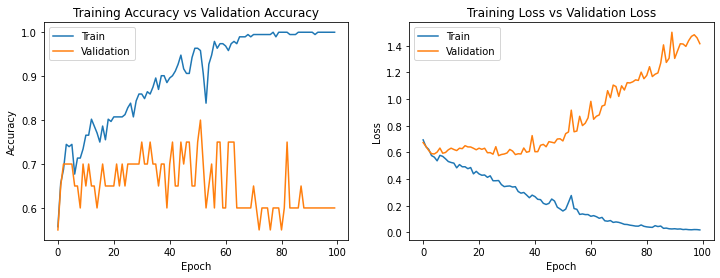

In [366]:
plot_acc_loss(history)

     Result : Over-fitting

In [367]:
model_2 = build_classifier()

In [374]:
# Change the learning rate, to learning more slow

opt = Adam(learning_rate = 0.00001)

model_2.compile( optimizer=opt, loss='binary_crossentropy', metrics = ['accuracy'] )

In [375]:
history = model_2.fit(x_train, y_train, batch_size = 10, epochs =100, validation_data = (x_val, y_val) )

Epoch 1/100
20/20 [==============================] - 1s 41ms/step - loss: 0.4611 - accuracy: 0.7688 - val_loss: 0.5603 - val_accuracy: 0.7500
Epoch 2/100
20/20 [==============================] - 1s 29ms/step - loss: 0.4664 - accuracy: 0.7836 - val_loss: 0.5600 - val_accuracy: 0.7500
Epoch 3/100
20/20 [==============================] - 1s 34ms/step - loss: 0.4416 - accuracy: 0.8059 - val_loss: 0.5598 - val_accuracy: 0.7500
Epoch 4/100
20/20 [==============================] - 1s 30ms/step - loss: 0.4824 - accuracy: 0.7648 - val_loss: 0.5599 - val_accuracy: 0.7500
Epoch 5/100
20/20 [==============================] - 1s 30ms/step - loss: 0.4689 - accuracy: 0.7844 - val_loss: 0.5600 - val_accuracy: 0.7500
Epoch 6/100
20/20 [==============================] - 1s 30ms/step - loss: 0.5080 - accuracy: 0.7460 - val_loss: 0.5598 - val_accuracy: 0.7500
Epoch 7/100
20/20 [==============================] - 1s 26ms/step - loss: 0.4559 - accuracy: 0.7541 - val_loss: 0.5597 - val_accuracy: 0.7500
Epoch 

20/20 [==============================] - 0s 19ms/step - loss: 0.4841 - accuracy: 0.7698 - val_loss: 0.5586 - val_accuracy: 0.7500
Epoch 59/100
20/20 [==============================] - 0s 19ms/step - loss: 0.4473 - accuracy: 0.7901 - val_loss: 0.5586 - val_accuracy: 0.7500
Epoch 60/100
20/20 [==============================] - 0s 23ms/step - loss: 0.4527 - accuracy: 0.7642 - val_loss: 0.5585 - val_accuracy: 0.7500
Epoch 61/100
20/20 [==============================] - 0s 20ms/step - loss: 0.4470 - accuracy: 0.8044 - val_loss: 0.5585 - val_accuracy: 0.7500
Epoch 62/100
20/20 [==============================] - 0s 23ms/step - loss: 0.5252 - accuracy: 0.7488 - val_loss: 0.5586 - val_accuracy: 0.7500
Epoch 63/100
20/20 [==============================] - 0s 19ms/step - loss: 0.4082 - accuracy: 0.8293 - val_loss: 0.5589 - val_accuracy: 0.7000
Epoch 64/100
20/20 [==============================] - 0s 19ms/step - loss: 0.4878 - accuracy: 0.7489 - val_loss: 0.5589 - val_accuracy: 0.7500
Epoch 65/100

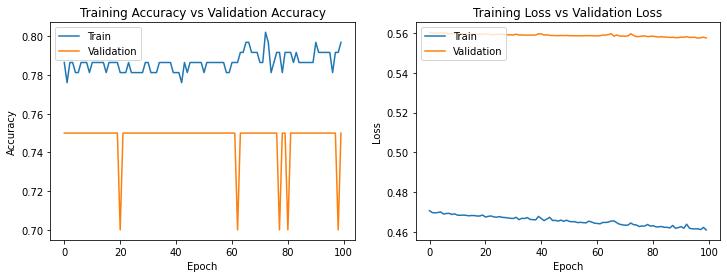

In [376]:
plot_acc_loss(history)

    Next Step : update epochs to 2000

In [377]:
model_3 = build_classifier()
opt = Adam(learning_rate = 0.00001)
model_3.compile( optimizer=opt, loss='binary_crossentropy', metrics = ['accuracy'] )

In [382]:
history = model_3.fit(x_train, y_train, batch_size = 10, epochs = 2000, validation_data = (x_val, y_val) )

Epoch 1/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.4364 - accuracy: 0.8385 - val_loss: 0.5431 - val_accuracy: 0.8000
Epoch 2/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.4354 - accuracy: 0.8385 - val_loss: 0.5431 - val_accuracy: 0.8000
Epoch 3/2000
20/20 [==============================] - 0s 18ms/step - loss: 0.4355 - accuracy: 0.8385 - val_loss: 0.5432 - val_accuracy: 0.8000
Epoch 4/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.4366 - accuracy: 0.8177 - val_loss: 0.5439 - val_accuracy: 0.8000
Epoch 5/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.4351 - accuracy: 0.8385 - val_loss: 0.5431 - val_accuracy: 0.8000
Epoch 6/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.4351 - accuracy: 0.8281 - val_loss: 0.5435 - val_accuracy: 0.8000
Epoch 7/2000
20/20 [==============================] - 0s 18ms/step - loss: 0.4358 - accuracy: 0.8281 - val_loss: 0.5435 - val_accuracy: 0.8000

Epoch 58/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.4298 - accuracy: 0.8438 - val_loss: 0.5428 - val_accuracy: 0.8000
Epoch 59/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.4308 - accuracy: 0.8385 - val_loss: 0.5428 - val_accuracy: 0.8000
Epoch 60/2000
20/20 [==============================] - 0s 20ms/step - loss: 0.4297 - accuracy: 0.8385 - val_loss: 0.5427 - val_accuracy: 0.8000
Epoch 61/2000
20/20 [==============================] - 0s 18ms/step - loss: 0.4294 - accuracy: 0.8385 - val_loss: 0.5428 - val_accuracy: 0.8000
Epoch 62/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.4302 - accuracy: 0.8333 - val_loss: 0.5430 - val_accuracy: 0.8000
Epoch 63/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.4296 - accuracy: 0.8385 - val_loss: 0.5428 - val_accuracy: 0.8000
Epoch 64/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.4299 - accuracy: 0.8385 - val_loss: 0.5428 - val_accuracy:

Epoch 115/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.4246 - accuracy: 0.8438 - val_loss: 0.5431 - val_accuracy: 0.8000
Epoch 116/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.4236 - accuracy: 0.8438 - val_loss: 0.5422 - val_accuracy: 0.8000
Epoch 117/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.4238 - accuracy: 0.8385 - val_loss: 0.5424 - val_accuracy: 0.8000
Epoch 118/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.4239 - accuracy: 0.8333 - val_loss: 0.5420 - val_accuracy: 0.8000
Epoch 119/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.4239 - accuracy: 0.8385 - val_loss: 0.5419 - val_accuracy: 0.8000
Epoch 120/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.4229 - accuracy: 0.8438 - val_loss: 0.5420 - val_accuracy: 0.8000
Epoch 121/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.4233 - accuracy: 0.8438 - val_loss: 0.5419 - val_ac

20/20 [==============================] - 0s 17ms/step - loss: 0.4193 - accuracy: 0.8385 - val_loss: 0.5413 - val_accuracy: 0.8000
Epoch 172/2000
20/20 [==============================] - 0s 21ms/step - loss: 0.4184 - accuracy: 0.8490 - val_loss: 0.5415 - val_accuracy: 0.8000
Epoch 173/2000
20/20 [==============================] - 0s 20ms/step - loss: 0.4182 - accuracy: 0.8490 - val_loss: 0.5414 - val_accuracy: 0.8000
Epoch 174/2000
20/20 [==============================] - 0s 22ms/step - loss: 0.4179 - accuracy: 0.8385 - val_loss: 0.5414 - val_accuracy: 0.8000
Epoch 175/2000
20/20 [==============================] - 0s 19ms/step - loss: 0.4183 - accuracy: 0.8281 - val_loss: 0.5413 - val_accuracy: 0.8000
Epoch 176/2000
20/20 [==============================] - 0s 19ms/step - loss: 0.4176 - accuracy: 0.8385 - val_loss: 0.5412 - val_accuracy: 0.8000
Epoch 177/2000
20/20 [==============================] - 0s 19ms/step - loss: 0.4174 - accuracy: 0.8490 - val_loss: 0.5413 - val_accuracy: 0.8000


20/20 [==============================] - 0s 24ms/step - loss: 0.4128 - accuracy: 0.8490 - val_loss: 0.5404 - val_accuracy: 0.8000
Epoch 228/2000
20/20 [==============================] - 0s 19ms/step - loss: 0.4135 - accuracy: 0.8490 - val_loss: 0.5407 - val_accuracy: 0.8000
Epoch 229/2000
20/20 [==============================] - 0s 19ms/step - loss: 0.4124 - accuracy: 0.8490 - val_loss: 0.5404 - val_accuracy: 0.8000
Epoch 230/2000
20/20 [==============================] - 0s 19ms/step - loss: 0.4123 - accuracy: 0.8438 - val_loss: 0.5403 - val_accuracy: 0.8000
Epoch 231/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.4132 - accuracy: 0.8333 - val_loss: 0.5403 - val_accuracy: 0.8000
Epoch 232/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.4124 - accuracy: 0.8490 - val_loss: 0.5405 - val_accuracy: 0.8000
Epoch 233/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.4126 - accuracy: 0.8490 - val_loss: 0.5408 - val_accuracy: 0.8000


20/20 [==============================] - 0s 16ms/step - loss: 0.4069 - accuracy: 0.8438 - val_loss: 0.5392 - val_accuracy: 0.8000
Epoch 284/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.4072 - accuracy: 0.8438 - val_loss: 0.5392 - val_accuracy: 0.8000
Epoch 285/2000
20/20 [==============================] - 0s 19ms/step - loss: 0.4072 - accuracy: 0.8385 - val_loss: 0.5400 - val_accuracy: 0.8000
Epoch 286/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.4066 - accuracy: 0.8490 - val_loss: 0.5394 - val_accuracy: 0.8000
Epoch 287/2000
20/20 [==============================] - 0s 18ms/step - loss: 0.4065 - accuracy: 0.8490 - val_loss: 0.5393 - val_accuracy: 0.8000
Epoch 288/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.4075 - accuracy: 0.8490 - val_loss: 0.5393 - val_accuracy: 0.8000
Epoch 289/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.4067 - accuracy: 0.8333 - val_loss: 0.5390 - val_accuracy: 0.8000


20/20 [==============================] - 0s 17ms/step - loss: 0.4006 - accuracy: 0.8385 - val_loss: 0.5375 - val_accuracy: 0.8000
Epoch 340/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.4049 - accuracy: 0.8385 - val_loss: 0.5386 - val_accuracy: 0.7500
Epoch 341/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.4013 - accuracy: 0.8385 - val_loss: 0.5373 - val_accuracy: 0.8000
Epoch 342/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.4008 - accuracy: 0.8490 - val_loss: 0.5373 - val_accuracy: 0.8000
Epoch 343/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.4015 - accuracy: 0.8438 - val_loss: 0.5376 - val_accuracy: 0.8000
Epoch 344/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.4009 - accuracy: 0.8438 - val_loss: 0.5374 - val_accuracy: 0.8000
Epoch 345/2000
20/20 [==============================] - 0s 18ms/step - loss: 0.4005 - accuracy: 0.8438 - val_loss: 0.5374 - val_accuracy: 0.8000


20/20 [==============================] - 0s 17ms/step - loss: 0.3958 - accuracy: 0.8490 - val_loss: 0.5359 - val_accuracy: 0.8000
Epoch 396/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.3959 - accuracy: 0.8490 - val_loss: 0.5357 - val_accuracy: 0.8000
Epoch 397/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3957 - accuracy: 0.8490 - val_loss: 0.5357 - val_accuracy: 0.8000
Epoch 398/2000
20/20 [==============================] - 0s 21ms/step - loss: 0.3967 - accuracy: 0.8385 - val_loss: 0.5359 - val_accuracy: 0.8000
Epoch 399/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3957 - accuracy: 0.8490 - val_loss: 0.5356 - val_accuracy: 0.8000
Epoch 400/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3952 - accuracy: 0.8438 - val_loss: 0.5357 - val_accuracy: 0.8000
Epoch 401/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3955 - accuracy: 0.8490 - val_loss: 0.5354 - val_accuracy: 0.8000


20/20 [==============================] - 0s 17ms/step - loss: 0.3908 - accuracy: 0.8490 - val_loss: 0.5336 - val_accuracy: 0.8000
Epoch 452/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3916 - accuracy: 0.8490 - val_loss: 0.5335 - val_accuracy: 0.8000
Epoch 453/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3904 - accuracy: 0.8490 - val_loss: 0.5336 - val_accuracy: 0.8000
Epoch 454/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3900 - accuracy: 0.8490 - val_loss: 0.5334 - val_accuracy: 0.8000
Epoch 455/2000
20/20 [==============================] - 0s 18ms/step - loss: 0.3904 - accuracy: 0.8490 - val_loss: 0.5335 - val_accuracy: 0.8000
Epoch 456/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.3904 - accuracy: 0.8490 - val_loss: 0.5333 - val_accuracy: 0.8000
Epoch 457/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.3904 - accuracy: 0.8490 - val_loss: 0.5332 - val_accuracy: 0.8000


20/20 [==============================] - 0s 17ms/step - loss: 0.3850 - accuracy: 0.8438 - val_loss: 0.5318 - val_accuracy: 0.8000
Epoch 508/2000
20/20 [==============================] - 0s 19ms/step - loss: 0.3849 - accuracy: 0.8438 - val_loss: 0.5319 - val_accuracy: 0.8000
Epoch 509/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3848 - accuracy: 0.8438 - val_loss: 0.5318 - val_accuracy: 0.8000
Epoch 510/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.3849 - accuracy: 0.8438 - val_loss: 0.5317 - val_accuracy: 0.8000
Epoch 511/2000
20/20 [==============================] - 0s 19ms/step - loss: 0.3848 - accuracy: 0.8490 - val_loss: 0.5315 - val_accuracy: 0.8000
Epoch 512/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3850 - accuracy: 0.8490 - val_loss: 0.5314 - val_accuracy: 0.8000
Epoch 513/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.3855 - accuracy: 0.8490 - val_loss: 0.5314 - val_accuracy: 0.8000


20/20 [==============================] - 0s 16ms/step - loss: 0.3803 - accuracy: 0.8490 - val_loss: 0.5298 - val_accuracy: 0.8000
Epoch 564/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3804 - accuracy: 0.8490 - val_loss: 0.5306 - val_accuracy: 0.8000
Epoch 565/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.3808 - accuracy: 0.8385 - val_loss: 0.5306 - val_accuracy: 0.8000
Epoch 566/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3796 - accuracy: 0.8490 - val_loss: 0.5301 - val_accuracy: 0.8000
Epoch 567/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3808 - accuracy: 0.8438 - val_loss: 0.5299 - val_accuracy: 0.8000
Epoch 568/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3794 - accuracy: 0.8594 - val_loss: 0.5294 - val_accuracy: 0.8000
Epoch 569/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3794 - accuracy: 0.8646 - val_loss: 0.5295 - val_accuracy: 0.8000


20/20 [==============================] - 0s 18ms/step - loss: 0.3746 - accuracy: 0.8698 - val_loss: 0.5276 - val_accuracy: 0.8000
Epoch 620/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.3739 - accuracy: 0.8594 - val_loss: 0.5278 - val_accuracy: 0.8000
Epoch 621/2000
20/20 [==============================] - 1s 28ms/step - loss: 0.3744 - accuracy: 0.8646 - val_loss: 0.5275 - val_accuracy: 0.8000
Epoch 622/2000
20/20 [==============================] - 0s 19ms/step - loss: 0.3747 - accuracy: 0.8646 - val_loss: 0.5289 - val_accuracy: 0.8000
Epoch 623/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.3748 - accuracy: 0.8490 - val_loss: 0.5275 - val_accuracy: 0.8000
Epoch 624/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.3741 - accuracy: 0.8698 - val_loss: 0.5274 - val_accuracy: 0.8000
Epoch 625/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.3741 - accuracy: 0.8646 - val_loss: 0.5274 - val_accuracy: 0.8000


20/20 [==============================] - 0s 17ms/step - loss: 0.3693 - accuracy: 0.8698 - val_loss: 0.5259 - val_accuracy: 0.8000
Epoch 676/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3690 - accuracy: 0.8698 - val_loss: 0.5256 - val_accuracy: 0.8000
Epoch 677/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3705 - accuracy: 0.8698 - val_loss: 0.5259 - val_accuracy: 0.8000
Epoch 678/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3698 - accuracy: 0.8698 - val_loss: 0.5254 - val_accuracy: 0.8000
Epoch 679/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3697 - accuracy: 0.8698 - val_loss: 0.5256 - val_accuracy: 0.8000
Epoch 680/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3709 - accuracy: 0.8750 - val_loss: 0.5257 - val_accuracy: 0.8000
Epoch 681/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3670 - accuracy: 0.8698 - val_loss: 0.5255 - val_accuracy: 0.8000


20/20 [==============================] - 0s 18ms/step - loss: 0.3648 - accuracy: 0.8698 - val_loss: 0.5236 - val_accuracy: 0.8000
Epoch 732/2000
20/20 [==============================] - 0s 21ms/step - loss: 0.3651 - accuracy: 0.8698 - val_loss: 0.5237 - val_accuracy: 0.8000
Epoch 733/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3650 - accuracy: 0.8646 - val_loss: 0.5243 - val_accuracy: 0.8000
Epoch 734/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3664 - accuracy: 0.8646 - val_loss: 0.5238 - val_accuracy: 0.8000
Epoch 735/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.3633 - accuracy: 0.8698 - val_loss: 0.5231 - val_accuracy: 0.8000
Epoch 736/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.3653 - accuracy: 0.8750 - val_loss: 0.5236 - val_accuracy: 0.8000
Epoch 737/2000
20/20 [==============================] - 0s 19ms/step - loss: 0.3641 - accuracy: 0.8698 - val_loss: 0.5231 - val_accuracy: 0.8000


20/20 [==============================] - 0s 20ms/step - loss: 0.3603 - accuracy: 0.8698 - val_loss: 0.5210 - val_accuracy: 0.8000
Epoch 788/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.3599 - accuracy: 0.8750 - val_loss: 0.5210 - val_accuracy: 0.8000
Epoch 789/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3599 - accuracy: 0.8698 - val_loss: 0.5217 - val_accuracy: 0.8000
Epoch 790/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3591 - accuracy: 0.8698 - val_loss: 0.5214 - val_accuracy: 0.8000
Epoch 791/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.3597 - accuracy: 0.8698 - val_loss: 0.5210 - val_accuracy: 0.8000
Epoch 792/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3594 - accuracy: 0.8750 - val_loss: 0.5208 - val_accuracy: 0.8000
Epoch 793/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.3591 - accuracy: 0.8750 - val_loss: 0.5210 - val_accuracy: 0.8000


20/20 [==============================] - 0s 17ms/step - loss: 0.3557 - accuracy: 0.8698 - val_loss: 0.5198 - val_accuracy: 0.8000
Epoch 844/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.3548 - accuracy: 0.8698 - val_loss: 0.5189 - val_accuracy: 0.8000
Epoch 845/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.3542 - accuracy: 0.8698 - val_loss: 0.5185 - val_accuracy: 0.8000
Epoch 846/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3538 - accuracy: 0.8698 - val_loss: 0.5183 - val_accuracy: 0.8000
Epoch 847/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3539 - accuracy: 0.8750 - val_loss: 0.5186 - val_accuracy: 0.8000
Epoch 848/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3543 - accuracy: 0.8802 - val_loss: 0.5184 - val_accuracy: 0.8000
Epoch 849/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3550 - accuracy: 0.8750 - val_loss: 0.5183 - val_accuracy: 0.8000


20/20 [==============================] - 0s 17ms/step - loss: 0.3495 - accuracy: 0.8698 - val_loss: 0.5163 - val_accuracy: 0.8000
Epoch 900/2000
20/20 [==============================] - 0s 19ms/step - loss: 0.3500 - accuracy: 0.8698 - val_loss: 0.5164 - val_accuracy: 0.8000
Epoch 901/2000
20/20 [==============================] - 0s 18ms/step - loss: 0.3498 - accuracy: 0.8698 - val_loss: 0.5162 - val_accuracy: 0.8000
Epoch 902/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3494 - accuracy: 0.8750 - val_loss: 0.5161 - val_accuracy: 0.8000
Epoch 903/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3491 - accuracy: 0.8698 - val_loss: 0.5161 - val_accuracy: 0.8000
Epoch 904/2000
20/20 [==============================] - 0s 20ms/step - loss: 0.3499 - accuracy: 0.8750 - val_loss: 0.5161 - val_accuracy: 0.8000
Epoch 905/2000
20/20 [==============================] - 0s 21ms/step - loss: 0.3502 - accuracy: 0.8698 - val_loss: 0.5160 - val_accuracy: 0.8000


20/20 [==============================] - 0s 17ms/step - loss: 0.3448 - accuracy: 0.8698 - val_loss: 0.5140 - val_accuracy: 0.8000
Epoch 956/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3447 - accuracy: 0.8698 - val_loss: 0.5147 - val_accuracy: 0.8000
Epoch 957/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.3452 - accuracy: 0.8698 - val_loss: 0.5139 - val_accuracy: 0.8000
Epoch 958/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.3450 - accuracy: 0.8750 - val_loss: 0.5138 - val_accuracy: 0.8000
Epoch 959/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.3443 - accuracy: 0.8698 - val_loss: 0.5137 - val_accuracy: 0.8000
Epoch 960/2000
20/20 [==============================] - 0s 19ms/step - loss: 0.3439 - accuracy: 0.8698 - val_loss: 0.5138 - val_accuracy: 0.8000
Epoch 961/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.3437 - accuracy: 0.8698 - val_loss: 0.5144 - val_accuracy: 0.8000


20/20 [==============================] - 0s 20ms/step - loss: 0.3406 - accuracy: 0.8698 - val_loss: 0.5123 - val_accuracy: 0.8000
Epoch 1012/2000
20/20 [==============================] - 0s 19ms/step - loss: 0.3409 - accuracy: 0.8698 - val_loss: 0.5118 - val_accuracy: 0.8000
Epoch 1013/2000
20/20 [==============================] - 0s 18ms/step - loss: 0.3394 - accuracy: 0.8698 - val_loss: 0.5122 - val_accuracy: 0.8000
Epoch 1014/2000
20/20 [==============================] - 0s 18ms/step - loss: 0.3396 - accuracy: 0.8698 - val_loss: 0.5118 - val_accuracy: 0.8000
Epoch 1015/2000
20/20 [==============================] - 0s 19ms/step - loss: 0.3391 - accuracy: 0.8698 - val_loss: 0.5118 - val_accuracy: 0.8000
Epoch 1016/2000
20/20 [==============================] - 0s 18ms/step - loss: 0.3391 - accuracy: 0.8698 - val_loss: 0.5117 - val_accuracy: 0.8000
Epoch 1017/2000
20/20 [==============================] - 0s 19ms/step - loss: 0.3391 - accuracy: 0.8698 - val_loss: 0.5119 - val_accuracy: 0

20/20 [==============================] - 0s 16ms/step - loss: 0.3347 - accuracy: 0.8698 - val_loss: 0.5094 - val_accuracy: 0.8000
Epoch 1068/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3366 - accuracy: 0.8802 - val_loss: 0.5093 - val_accuracy: 0.8000
Epoch 1069/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.3347 - accuracy: 0.8750 - val_loss: 0.5093 - val_accuracy: 0.8000
Epoch 1070/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.3351 - accuracy: 0.8698 - val_loss: 0.5105 - val_accuracy: 0.8000
Epoch 1071/2000
20/20 [==============================] - 0s 20ms/step - loss: 0.3381 - accuracy: 0.8698 - val_loss: 0.5093 - val_accuracy: 0.8000
Epoch 1072/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.3347 - accuracy: 0.8698 - val_loss: 0.5093 - val_accuracy: 0.8000
Epoch 1073/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3340 - accuracy: 0.8698 - val_loss: 0.5093 - val_accuracy: 0

20/20 [==============================] - 0s 17ms/step - loss: 0.3310 - accuracy: 0.8698 - val_loss: 0.5076 - val_accuracy: 0.8000
Epoch 1124/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3307 - accuracy: 0.8698 - val_loss: 0.5073 - val_accuracy: 0.8000
Epoch 1125/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3305 - accuracy: 0.8698 - val_loss: 0.5072 - val_accuracy: 0.8000
Epoch 1126/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3303 - accuracy: 0.8698 - val_loss: 0.5072 - val_accuracy: 0.8000
Epoch 1127/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3310 - accuracy: 0.8698 - val_loss: 0.5073 - val_accuracy: 0.8000
Epoch 1128/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.3293 - accuracy: 0.8698 - val_loss: 0.5071 - val_accuracy: 0.8000
Epoch 1129/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.3294 - accuracy: 0.8750 - val_loss: 0.5069 - val_accuracy: 0

20/20 [==============================] - 0s 19ms/step - loss: 0.3253 - accuracy: 0.8698 - val_loss: 0.5056 - val_accuracy: 0.8000
Epoch 1180/2000
20/20 [==============================] - 0s 18ms/step - loss: 0.3254 - accuracy: 0.8646 - val_loss: 0.5055 - val_accuracy: 0.8000
Epoch 1181/2000
20/20 [==============================] - 0s 19ms/step - loss: 0.3260 - accuracy: 0.8646 - val_loss: 0.5057 - val_accuracy: 0.8000
Epoch 1182/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3260 - accuracy: 0.8646 - val_loss: 0.5050 - val_accuracy: 0.8000
Epoch 1183/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.3270 - accuracy: 0.8698 - val_loss: 0.5047 - val_accuracy: 0.8000
Epoch 1184/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3249 - accuracy: 0.8698 - val_loss: 0.5049 - val_accuracy: 0.8000
Epoch 1185/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3248 - accuracy: 0.8698 - val_loss: 0.5046 - val_accuracy: 0

20/20 [==============================] - 0s 17ms/step - loss: 0.3224 - accuracy: 0.8698 - val_loss: 0.5029 - val_accuracy: 0.8000
Epoch 1236/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.3211 - accuracy: 0.8750 - val_loss: 0.5028 - val_accuracy: 0.8000
Epoch 1237/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3212 - accuracy: 0.8646 - val_loss: 0.5034 - val_accuracy: 0.8000
Epoch 1238/2000
20/20 [==============================] - 0s 20ms/step - loss: 0.3205 - accuracy: 0.8646 - val_loss: 0.5032 - val_accuracy: 0.8000
Epoch 1239/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3199 - accuracy: 0.8750 - val_loss: 0.5029 - val_accuracy: 0.8000
Epoch 1240/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3220 - accuracy: 0.8750 - val_loss: 0.5028 - val_accuracy: 0.8000
Epoch 1241/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3177 - accuracy: 0.8646 - val_loss: 0.5052 - val_accuracy: 0

20/20 [==============================] - 0s 19ms/step - loss: 0.3187 - accuracy: 0.8646 - val_loss: 0.5015 - val_accuracy: 0.8000
Epoch 1292/2000
20/20 [==============================] - 0s 19ms/step - loss: 0.3165 - accuracy: 0.8646 - val_loss: 0.5008 - val_accuracy: 0.8000
Epoch 1293/2000
20/20 [==============================] - 0s 19ms/step - loss: 0.3165 - accuracy: 0.8646 - val_loss: 0.5007 - val_accuracy: 0.8000
Epoch 1294/2000
20/20 [==============================] - 0s 18ms/step - loss: 0.3158 - accuracy: 0.8802 - val_loss: 0.5013 - val_accuracy: 0.8000
Epoch 1295/2000
20/20 [==============================] - 0s 19ms/step - loss: 0.3160 - accuracy: 0.8802 - val_loss: 0.5006 - val_accuracy: 0.8000
Epoch 1296/2000
20/20 [==============================] - 0s 19ms/step - loss: 0.3158 - accuracy: 0.8750 - val_loss: 0.5008 - val_accuracy: 0.8000
Epoch 1297/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.3181 - accuracy: 0.8750 - val_loss: 0.5006 - val_accuracy: 0

20/20 [==============================] - 0s 17ms/step - loss: 0.3119 - accuracy: 0.8698 - val_loss: 0.4989 - val_accuracy: 0.8000
Epoch 1348/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.3118 - accuracy: 0.8750 - val_loss: 0.4989 - val_accuracy: 0.8000
Epoch 1349/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3114 - accuracy: 0.8802 - val_loss: 0.4987 - val_accuracy: 0.8000
Epoch 1350/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3108 - accuracy: 0.8698 - val_loss: 0.4993 - val_accuracy: 0.8000
Epoch 1351/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3120 - accuracy: 0.8750 - val_loss: 0.4988 - val_accuracy: 0.8000
Epoch 1352/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3140 - accuracy: 0.8698 - val_loss: 0.4997 - val_accuracy: 0.8000
Epoch 1353/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.3121 - accuracy: 0.8698 - val_loss: 0.4992 - val_accuracy: 0

20/20 [==============================] - 0s 16ms/step - loss: 0.3073 - accuracy: 0.8802 - val_loss: 0.4966 - val_accuracy: 0.8000
Epoch 1404/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3076 - accuracy: 0.8802 - val_loss: 0.4968 - val_accuracy: 0.8000
Epoch 1405/2000
20/20 [==============================] - 0s 19ms/step - loss: 0.3070 - accuracy: 0.8906 - val_loss: 0.4964 - val_accuracy: 0.8000
Epoch 1406/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.3070 - accuracy: 0.8698 - val_loss: 0.4966 - val_accuracy: 0.8000
Epoch 1407/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3071 - accuracy: 0.8698 - val_loss: 0.4963 - val_accuracy: 0.8000
Epoch 1408/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.3069 - accuracy: 0.8698 - val_loss: 0.4964 - val_accuracy: 0.8000
Epoch 1409/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3074 - accuracy: 0.8646 - val_loss: 0.4963 - val_accuracy: 0

20/20 [==============================] - 0s 17ms/step - loss: 0.3033 - accuracy: 0.8802 - val_loss: 0.4949 - val_accuracy: 0.8000
Epoch 1460/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.3030 - accuracy: 0.8750 - val_loss: 0.4948 - val_accuracy: 0.8000
Epoch 1461/2000
20/20 [==============================] - 0s 19ms/step - loss: 0.3025 - accuracy: 0.8802 - val_loss: 0.4949 - val_accuracy: 0.8000
Epoch 1462/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.3030 - accuracy: 0.8802 - val_loss: 0.4947 - val_accuracy: 0.8000
Epoch 1463/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3029 - accuracy: 0.8750 - val_loss: 0.4949 - val_accuracy: 0.8000
Epoch 1464/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.3026 - accuracy: 0.8698 - val_loss: 0.4949 - val_accuracy: 0.8000
Epoch 1465/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.3038 - accuracy: 0.8698 - val_loss: 0.4947 - val_accuracy: 0

20/20 [==============================] - 0s 22ms/step - loss: 0.2986 - accuracy: 0.8854 - val_loss: 0.4930 - val_accuracy: 0.8000
Epoch 1516/2000
20/20 [==============================] - 0s 19ms/step - loss: 0.2982 - accuracy: 0.8750 - val_loss: 0.4930 - val_accuracy: 0.8000
Epoch 1517/2000
20/20 [==============================] - 0s 19ms/step - loss: 0.2980 - accuracy: 0.8802 - val_loss: 0.4933 - val_accuracy: 0.8000
Epoch 1518/2000
20/20 [==============================] - 0s 18ms/step - loss: 0.2987 - accuracy: 0.8646 - val_loss: 0.4938 - val_accuracy: 0.8000
Epoch 1519/2000
20/20 [==============================] - 0s 18ms/step - loss: 0.2989 - accuracy: 0.8646 - val_loss: 0.4929 - val_accuracy: 0.8000
Epoch 1520/2000
20/20 [==============================] - 0s 19ms/step - loss: 0.2980 - accuracy: 0.8802 - val_loss: 0.4930 - val_accuracy: 0.8000
Epoch 1521/2000
20/20 [==============================] - 0s 20ms/step - loss: 0.2989 - accuracy: 0.8802 - val_loss: 0.4931 - val_accuracy: 0

20/20 [==============================] - 0s 19ms/step - loss: 0.2938 - accuracy: 0.8854 - val_loss: 0.4913 - val_accuracy: 0.8000
Epoch 1572/2000
20/20 [==============================] - 0s 19ms/step - loss: 0.2935 - accuracy: 0.8854 - val_loss: 0.4913 - val_accuracy: 0.8000
Epoch 1573/2000
20/20 [==============================] - 0s 19ms/step - loss: 0.2940 - accuracy: 0.8698 - val_loss: 0.4918 - val_accuracy: 0.8000
Epoch 1574/2000
20/20 [==============================] - 0s 20ms/step - loss: 0.2966 - accuracy: 0.8698 - val_loss: 0.4916 - val_accuracy: 0.8000
Epoch 1575/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.2939 - accuracy: 0.8698 - val_loss: 0.4921 - val_accuracy: 0.8000
Epoch 1576/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.2944 - accuracy: 0.8802 - val_loss: 0.4912 - val_accuracy: 0.8000
Epoch 1577/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.2932 - accuracy: 0.8802 - val_loss: 0.4912 - val_accuracy: 0

20/20 [==============================] - 0s 19ms/step - loss: 0.2912 - accuracy: 0.8906 - val_loss: 0.4896 - val_accuracy: 0.8000
Epoch 1628/2000
20/20 [==============================] - 0s 23ms/step - loss: 0.2892 - accuracy: 0.8802 - val_loss: 0.4894 - val_accuracy: 0.8000
Epoch 1629/2000
20/20 [==============================] - 0s 19ms/step - loss: 0.2892 - accuracy: 0.8750 - val_loss: 0.4898 - val_accuracy: 0.8000
Epoch 1630/2000
20/20 [==============================] - 0s 21ms/step - loss: 0.2894 - accuracy: 0.8646 - val_loss: 0.4895 - val_accuracy: 0.8000
Epoch 1631/2000
20/20 [==============================] - 0s 19ms/step - loss: 0.2901 - accuracy: 0.8698 - val_loss: 0.4894 - val_accuracy: 0.8000
Epoch 1632/2000
20/20 [==============================] - 0s 18ms/step - loss: 0.2888 - accuracy: 0.8854 - val_loss: 0.4894 - val_accuracy: 0.8000
Epoch 1633/2000
20/20 [==============================] - 0s 19ms/step - loss: 0.2889 - accuracy: 0.8854 - val_loss: 0.4894 - val_accuracy: 0

20/20 [==============================] - 0s 16ms/step - loss: 0.2853 - accuracy: 0.8802 - val_loss: 0.4887 - val_accuracy: 0.8000
Epoch 1684/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.2861 - accuracy: 0.8906 - val_loss: 0.4883 - val_accuracy: 0.8000
Epoch 1685/2000
20/20 [==============================] - 0s 21ms/step - loss: 0.2853 - accuracy: 0.8698 - val_loss: 0.4886 - val_accuracy: 0.8000
Epoch 1686/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.2853 - accuracy: 0.8958 - val_loss: 0.4885 - val_accuracy: 0.8000
Epoch 1687/2000
20/20 [==============================] - 0s 19ms/step - loss: 0.2854 - accuracy: 0.8958 - val_loss: 0.4883 - val_accuracy: 0.8000
Epoch 1688/2000
20/20 [==============================] - 0s 19ms/step - loss: 0.2851 - accuracy: 0.8906 - val_loss: 0.4883 - val_accuracy: 0.8000
Epoch 1689/2000
20/20 [==============================] - 0s 19ms/step - loss: 0.2849 - accuracy: 0.8854 - val_loss: 0.4883 - val_accuracy: 0

20/20 [==============================] - 0s 17ms/step - loss: 0.2812 - accuracy: 0.8750 - val_loss: 0.4867 - val_accuracy: 0.8000
Epoch 1740/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.2804 - accuracy: 0.8906 - val_loss: 0.4867 - val_accuracy: 0.8000
Epoch 1741/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.2809 - accuracy: 0.8906 - val_loss: 0.4868 - val_accuracy: 0.8000
Epoch 1742/2000
20/20 [==============================] - 0s 21ms/step - loss: 0.2808 - accuracy: 0.8906 - val_loss: 0.4865 - val_accuracy: 0.8000
Epoch 1743/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.2809 - accuracy: 0.8958 - val_loss: 0.4865 - val_accuracy: 0.8000
Epoch 1744/2000
20/20 [==============================] - 0s 19ms/step - loss: 0.2841 - accuracy: 0.8750 - val_loss: 0.4865 - val_accuracy: 0.8000
Epoch 1745/2000
20/20 [==============================] - 0s 19ms/step - loss: 0.2808 - accuracy: 0.8906 - val_loss: 0.4873 - val_accuracy: 0

20/20 [==============================] - 0s 20ms/step - loss: 0.2765 - accuracy: 0.8906 - val_loss: 0.4854 - val_accuracy: 0.8000
Epoch 1796/2000
20/20 [==============================] - 0s 19ms/step - loss: 0.2765 - accuracy: 0.8906 - val_loss: 0.4853 - val_accuracy: 0.8000
Epoch 1797/2000
20/20 [==============================] - 0s 19ms/step - loss: 0.2786 - accuracy: 0.8854 - val_loss: 0.4854 - val_accuracy: 0.8000
Epoch 1798/2000
20/20 [==============================] - 0s 18ms/step - loss: 0.2761 - accuracy: 0.8906 - val_loss: 0.4853 - val_accuracy: 0.8000
Epoch 1799/2000
20/20 [==============================] - 0s 19ms/step - loss: 0.2771 - accuracy: 0.8854 - val_loss: 0.4853 - val_accuracy: 0.8000
Epoch 1800/2000
20/20 [==============================] - 0s 19ms/step - loss: 0.2768 - accuracy: 0.8854 - val_loss: 0.4859 - val_accuracy: 0.8000
Epoch 1801/2000
20/20 [==============================] - 0s 18ms/step - loss: 0.2795 - accuracy: 0.8802 - val_loss: 0.4855 - val_accuracy: 0

20/20 [==============================] - 0s 17ms/step - loss: 0.2724 - accuracy: 0.8958 - val_loss: 0.4843 - val_accuracy: 0.8000
Epoch 1852/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.2727 - accuracy: 0.8906 - val_loss: 0.4842 - val_accuracy: 0.8000
Epoch 1853/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.2724 - accuracy: 0.8906 - val_loss: 0.4850 - val_accuracy: 0.8000
Epoch 1854/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.2731 - accuracy: 0.8854 - val_loss: 0.4847 - val_accuracy: 0.8000
Epoch 1855/2000
20/20 [==============================] - 0s 20ms/step - loss: 0.2720 - accuracy: 0.8906 - val_loss: 0.4843 - val_accuracy: 0.8000
Epoch 1856/2000
20/20 [==============================] - 0s 23ms/step - loss: 0.2721 - accuracy: 0.8958 - val_loss: 0.4847 - val_accuracy: 0.8000
Epoch 1857/2000
20/20 [==============================] - 0s 19ms/step - loss: 0.2719 - accuracy: 0.8958 - val_loss: 0.4841 - val_accuracy: 0

20/20 [==============================] - 0s 16ms/step - loss: 0.2694 - accuracy: 0.8854 - val_loss: 0.4837 - val_accuracy: 0.8000
Epoch 1908/2000
20/20 [==============================] - 0s 20ms/step - loss: 0.2677 - accuracy: 0.8958 - val_loss: 0.4838 - val_accuracy: 0.8000
Epoch 1909/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.2688 - accuracy: 0.8906 - val_loss: 0.4836 - val_accuracy: 0.8000
Epoch 1910/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.2695 - accuracy: 0.8802 - val_loss: 0.4843 - val_accuracy: 0.8000
Epoch 1911/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.2691 - accuracy: 0.8906 - val_loss: 0.4835 - val_accuracy: 0.8000
Epoch 1912/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.2677 - accuracy: 0.8906 - val_loss: 0.4834 - val_accuracy: 0.8000
Epoch 1913/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.2687 - accuracy: 0.8854 - val_loss: 0.4835 - val_accuracy: 0

20/20 [==============================] - 0s 17ms/step - loss: 0.2647 - accuracy: 0.8906 - val_loss: 0.4825 - val_accuracy: 0.8000
Epoch 1964/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.2641 - accuracy: 0.8906 - val_loss: 0.4826 - val_accuracy: 0.8000
Epoch 1965/2000
20/20 [==============================] - 0s 16ms/step - loss: 0.2639 - accuracy: 0.8906 - val_loss: 0.4824 - val_accuracy: 0.8000
Epoch 1966/2000
20/20 [==============================] - 0s 17ms/step - loss: 0.2642 - accuracy: 0.8854 - val_loss: 0.4824 - val_accuracy: 0.8000
Epoch 1967/2000
20/20 [==============================] - 0s 23ms/step - loss: 0.2671 - accuracy: 0.8802 - val_loss: 0.4824 - val_accuracy: 0.8000
Epoch 1968/2000
20/20 [==============================] - 0s 23ms/step - loss: 0.2694 - accuracy: 0.8854 - val_loss: 0.4873 - val_accuracy: 0.7500
Epoch 1969/2000
20/20 [==============================] - 0s 20ms/step - loss: 0.2645 - accuracy: 0.8854 - val_loss: 0.4825 - val_accuracy: 0

    Best model is 3

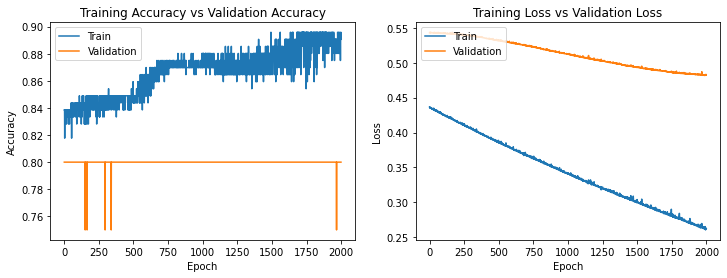

In [383]:
plot_acc_loss(history)

In [411]:
def prediction (y):
    if y == 1 :
        print('Quarto sujo')
    else :
        
        print('Quarto limpo')

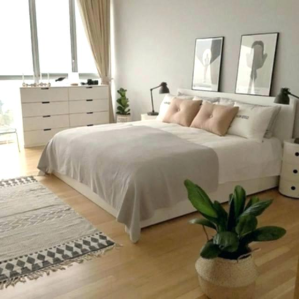

In [414]:
image_treatment = Image.open(process_test+'1.png')
image_treament = np.asarray(image_treatment) /255 
image_treament = image_treament.reshape(1,50,50,2)

image_visualization = Image.open(test_data+'1.png')
image_visualization

In [413]:
predict = model_3.predict_classes(image_treament)
prediction(predict)

Quarto limpo


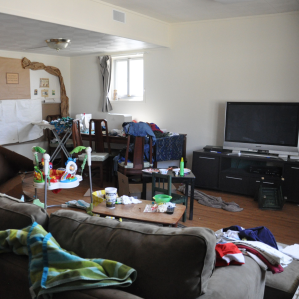

In [415]:
image_treatment = Image.open(process_test+'5.png')
image_treament = np.asarray(image_treatment) /255 
image_treament = image_treament.reshape(1,50,50,2)

image_visualization = Image.open(test_data+'5.png')
image_visualization

In [416]:
predict = model_3.predict_classes(image_treament)
prediction(predict)

Quarto sujo


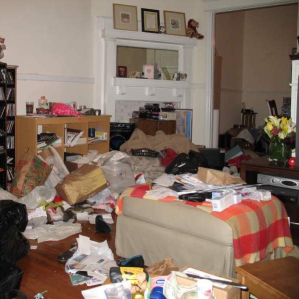

In [418]:
image_treatment = Image.open(process_test+'2.png')
image_treament = np.asarray(image_treatment) /255 
image_treament = image_treament.reshape(1,50,50,2)

image_visualization = Image.open(test_data+'2.png')
image_visualization

In [419]:
predict = model_3.predict_classes(image_treament)
prediction(predict)

Quarto sujo
